In [3]:
# Decision Tree(결정트리)
# - 트리를 만들기 위해  예/아니오 질문을 반복하며 학습
# - 분류와 회귀(클래스가 따로 없다, 평균치 사용하여 예츨)에 모두 사용 가능
# - 매,펭귄, 돌고래 ,곰 등을 테스트 할수 있다.

# - 값이 한개인 리프노드를 순수노드라고 한다
#    -> 모든노드가 순수노드가 될때까지 학습하면 복잡해지고 과대적합이된다.
# - 분류:클래스, 회귀: 평균값
        
# Decision Tree(결정트리) 과대적합 제어
# - 사전가지치기: 노드들이 뻗어나가기 전에 제어 조건을 미리지정해준다.
# - 사후가지치기: 뻗쳐놓고, 쓸모없거나 필요없는 가지를 제거
# - 트리의 최대깊이나 리프노드의 최대개수(마지막리프노드는 10개만만들어!)를 제어
# - 노드가 분할하기 위한 데이터 포인트의 최소 개수 지정(더 구분할수 있는 질문이 있어도 더이상 나누지마!)

# - 깊이가 깊어질수록 -> 노드가 많아진다 -> 복잡도가 높아진다

In [4]:
import pandas as pd

# 훈련, 테스트를 위해 데이터 섞어주는 것
from sklearn.model_selection import train_test_split

# Decision Tree 모델 받아오기(분류)
from sklearn.tree import DecisionTreeClassifier
# Decision Tree 모델 받아오기(회귀)
from sklearn.tree import DecisionTreeRegressor

# 분류 KNN 모델
from sklearn.neighbors import KNeighborsClassifier
# 회귀 KNN 모델
from sklearn.neighbors import KNeighborsRegressor

# EDA(탐색적 데이터 분석) 단계에서 불러오기
import matplotlib.pyplot as plt

# log를 씌워서 값의 편차를 줄이기 위해 불러옴
import numpy as np

#교차검증을 위한 라이브러리
from sklearn.model_selection import cross_val_score

# 1. 문제정의
-  버섯의 특징을 활용해서 독/식용 버섯 분류
-  Decision tree 시각화 & 과대적합 제어
- 특성 중요도 확인 (제일 잘 나눠진 질문의 영역)

## 2. 데이터 수집


In [5]:
mush=pd.read_csv('mushroom.csv')
mush.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 3. 데이터 전처리
- info: 결측치, 데이터 타입
- describe: 이상치 확인
- 결측치, 이상치를 확인할때 데이터가 수치형 데이터여야 한다.

In [6]:
# 결측치 파악
mush.info()

# 결측치 존재하지 않고, object 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
# 이상치 파악
mush.describe()

# count : 데이터 개수
# unique : 중복을 제거한 데이터 개수
# top : 가장많은 비율을 차지하는 데이터개수
# freq : top의 실제 데이터

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
mush["poisonous"].unique()

array(['p', 'e'], dtype=object)

### 3-1.문제와정답나누기(수치형전환위해)

In [9]:
# 문제(X) /정답 (y) 나누기
# 데이터가 object(=string) 타입이기 때문에 
# 수치형으로 나누기 위해서 미리 문제와 정답을 나누었다.

X= mush.iloc[:,1:]
y= mush.iloc[:,0]  # Series
#y= mush.iloc[:,:1] # DataFrame

print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


### 3-2.Encoding

In [10]:
# Encoding: 범주형 데이터(묶여있거나,문자형데이터)-> 숫자형 데이터로 변환

# - Label Encoding: 데이터를 직접바꾸는것(단순수치값으로 mappingg한다)
#   -> 수치형으로 바꾸기위한 방법중 하나

# - One-hot Encoding: 모든값을 0 또는 1로 구분
#    -> 구분하기 위해 컬럼의 개수를 늘린다(해당되면1,아니면0)

In [11]:
# 원핫인코딩 
# get_dummies 함수사용!

X_onehot = pd.get_dummies(X)

In [12]:
X_onehot.shape


(8124, 117)

### 3-3 Train/Test 분리

In [13]:
# Train , Test 분리
X_train,X_test,y_train,y_test=train_test_split(
                                            X_onehot, #문제데이터
                                            y, #정닶데이터
                                            random_state=3, # 섞는방법
                                             test_size=0.3) # 정답비율

In [14]:
# label Encoding
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [15]:
# 딕셔너리 자료형으로 만들기 : u 값이 어떤값을 명시하는지 분류해 줘야함

habitat_dic={
    'u':1, # u를 1로 바꾸겠다
    'g':2,
    'm':3,
    'd':4,
    'p':5,
    'w':6,
    'l':7,
}

a=X['habitat'].map(habitat_dic).value_counts()

In [16]:
a

4    3148
2    2148
5    1144
7     832
1     368
3     292
6     192
Name: habitat, dtype: int64

# 4. EDA(탐색적 데이터 분석)

<BarContainer object of 7 artists>

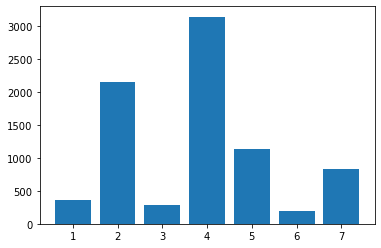

In [17]:
plt.bar(a.index,a) 
# 맷플로립을 이용한 바 차트 구현하기
# 데이터를 전처리하는 방법중 하나
# 이런데이터를 학습하면, 학습을 잘 못할경우가 생김,-> log를 씌워서 값의 편차를 줄이면 도움이된다.

In [18]:
np.log(a)
# 한곳에 데이터가 몰려있는데 그값이 중요하지 않을때 ,
# 중요도를 고르게 분포하고 싶을때 -> 값을 고르게 분포시킬수 있다.
# 2500정도 차이를 3으로 줄일수 있다.

4    8.054523
2    7.672292
5    7.042286
7    6.723832
1    5.908083
3    5.676754
6    5.257495
Name: habitat, dtype: float64

<BarContainer object of 7 artists>

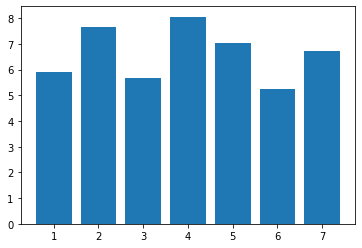

In [19]:
# 로그를 활용하여 편차를 줄인다.
plt.bar(a.index,np.log(a)) 

# 5. 모델선택 밒 하이퍼파라미터 튜닝

In [20]:
tree= DecisionTreeClassifier(max_depth=3)

In [21]:
# 교차검증
# 사용한모델, 훈련용문제(X_train),훈련용정답(y_train),몇겹 교차검증을 할건지
# cv=5이기때문에 5개의 값이 나옴=>5겹 교차검증
# 5개의 값이 모두다름 > 교차검증을 진행할때마다 train,test 데이터가 변함
# 5개의 값을 평균내서 testscore 값을 예츨 해 볼수 있음
# 최적의 파라미터를 찾을 수 있음

cross_val_score(tree,X_train,y_train,cv=5).mean()


0.9857546065942966

# 6.학습

In [22]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

# 7. 평가

In [23]:
print('train score',tree.score(X_train,y_train))
print('test score',tree.score(X_test,y_test))

train score 0.9857544846992613
test score 0.9840032813781788


In [24]:
# 트리모델의 특성 중요도 확인하기

fi=tree.feature_importances_
fi

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01673434, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.65130271, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.18590502, 0.        ,
       0.09492206, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01639556, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
# None -> 원하는 행이나 열 개수만큼 출력 가능 
# 모든행 출력
pd.set_option('display.max_rows',None)
# 모든 열 출력
pd.set_option('display.max_rows',None)

In [26]:
# 보기 좋게 만들기
# ppd.DataFrame(fi,index=X_onehot.columns).sort_values(by=0,ascending=False)
# 값만 있고 어떤특성인지 모른다.-> index=X_onehot.columns

# <특성중요도>
# 특성중요도는 0-1 사이의 숫자로 이루어짐
# 117개 컬럼의 특성중요도의 총합은 1
# 숫자가 높을수록 특성을 제일 많이 유지했다는 말 (값을 제일 잘 구분할수 있는 특성이다.)
#
importance_df=pd.DataFrame(fi,index=X_onehot.columns)
importance_df.sort_values(by=0,ascending = False)

,0
odor_n,0.651303
stalk-root_c,0.185905
stalk-root_r,0.094922
spore-print-color_r,0.034740
bruises_f,0.016734
stalk-surface-below-ring_y,0.016396
cap-shape_b,0.000000
stalk-color-below-ring_w,0.000000
stalk-color-below-ring_n,0.000000
stalk-color-below-ring_o,0.000000


In [27]:
# 시각화

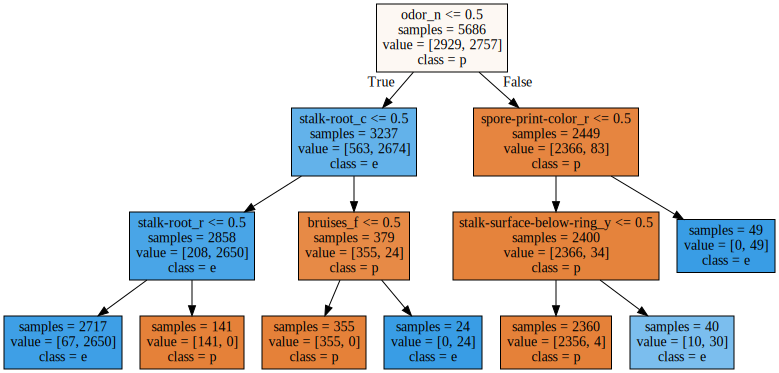

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=False, 
               filled=True)

# impurity: gini값을 표시
# gini:0-1까지로 이루어짐. 
# 0.5에 가까워질수록 좋지 않다.잘 나뉘지 않고 섞여있다.

# filled: 노드의 색깔을 T/F에 따라 구분하게 해줌

import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'
!pip install graphviz

import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))


# # 데이터를 나눌 질문: odor_n 
# # 현재 노드에 있는값:
# samples = 5686
# value = [2929, 2757] [p,e] 더 많은 것은 예측값으로
# class = p

# 마지막 리프노드는 더이상 나눌 질문이 없다 2 번만 존재하고 , 1번을 존재하지 않는다.

In [29]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

## Decision Tress 의 장점

In [30]:
# - 만들어진 모델을 쉽게 시각화 할수 있어서 이해하기 쉽다
# - 각 특성이 개별처리(하나의 컬럼에 하나의 질문)되기 때문에 
#    데이터 스케일에 영향을 받지않아(어떤컬럼에 값이 있을때 값이 클수록 중요하다는 생각하는 모델들이 있다
#    이런 모델들은 다시 값을 바꿔줘야한다) 특성의 정규화나 표준화가 필요 없다.-> 데이터 전처리 할게 줄었다
# - 트리구성시 각 특성의 중요도를 계산하기 떄문에 ,, 특성선택에 활용될수 있다.

## Decision Tress 의 단점

In [31]:
# - 훈련범위 밖의 포인트는 예측할수 없다-범위가 정해진 데이터에만 사용
#  (영역을 나눠서 어떤 영역에 어떤값이 들어있는지 판단,,, 이때 새로운 예측값이 영영밖에 있으면
#   결정트리는 예측하지 못한다) ex.시계열 데이터
    
# - 가지치기를 해도 과대적합되는 경향이 있다 ,, 빈번하게 일어나서 , 일반화 성능이 좋지 않다
#   해결하기 위해서 새로운 모델은 만들기도 한다..

# - 선형모델에는 적합하지 않다..

# 5.1 모델선택 및 하이퍼파라미터 튜닝 
# 6.1
# 7.1

In [32]:
# 모델선택
tree2=DecisionTreeClassifier(max_depth=3)
# 학습
tree2.fit(X_train,y_train)
#평가
print(f'train score:{tree2.score(X_train,y_train)}')
print('train score:{}'.format(tree2.score(X_train,y_train)))

train score:0.9857544846992613
train score:0.9857544846992613


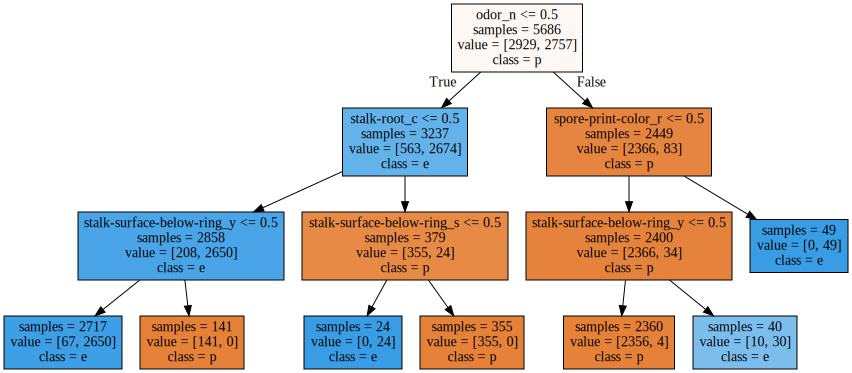

In [33]:
export_graphviz(tree2, out_file='tree2.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=False,
               filled=True)

os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'

with open('tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [34]:
check_call(['dot','-Tpng','tree2.dot','-o','tree2.png'])

0